# Creating and Cleaning Data Set

In [1]:
import pandas as pd
import csv

mvpdataload= "dataSets/MVPlayerOTY_fixed.xlsx"
seasonstatload = "dataSets/Seasons_Stats_fixed.csv"
teamrecordsload = "dataSets/Team_Records_fixed.csv"

sdata = pd.read_csv(seasonstatload)
mdata = pd.read_excel(mvpdataload)
tdata = pd.read_csv(teamrecordsload)

In [2]:
sdata.head()

,Year,Player,Pos,Age,Team,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,F,31.0,FTW,63,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458
1,1950,Cliff Barker,G,29.0,INO,49,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279
2,1950,Leo Barnhorst,F,25.0,CHS,67,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59


In [3]:
mdata.head()

,Year,Player,Award
0,2017,James Harden,MVP
1,2016,Russell Westbrook,MVP
2,2015,Stephen Curry,MVP
3,2014,Stephen Curry,MVP
4,2013,Kevin Durant,MVP


In [4]:
tdata.head()

,Year,Lg,Team,W,L,Winpct
0,2017,NBA,BOS,55,27,0.671
1,2017,NBA,TOR,59,23,0.720
2,2017,NBA,NYK,29,53,0.354
3,2017,NBA,PHI,52,30,0.634
4,2017,NBA,CHA,28,54,0.341


In [5]:
kndb = pd.merge(sdata, mdata, how='left', on=["Year","Player"])
kndb = pd.merge(kndb, tdata, how='left', on =["Year", "Team"])
kndb.head()

,Year,Player,Pos,Age,Team,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,Award,Lg,W,L,Winpct
0,1950,Curly Armstrong,F,31.0,FTW,63,NaN,NaN,NaN,0.368,...,NaN,NaN,NaN,217,458,NaN,NaN,NaN,NaN,NaN
1,1950,Cliff Barker,G,29.0,INO,49,NaN,NaN,NaN,0.435,...,NaN,NaN,NaN,99,279,NaN,NaN,NaN,NaN,NaN
2,1950,Leo Barnhorst,F,25.0,CHS,67,NaN,NaN,NaN,0.394,...,NaN,NaN,NaN,192,438,NaN,NaN,NaN,NaN,NaN
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,...,NaN,NaN,NaN,29,63,NaN,NaN,NaN,NaN,NaN
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,...,NaN,NaN,NaN,27,59,NaN,NaN,NaN,NaN,NaN


In [6]:
kndb.loc[kndb.Award == 'MVP', 'MVP_Ind'] = 1  
kndb.loc[kndb.Award != 'MVP', 'MVP_Ind'] = 0
kndb.head()

,Year,Player,Pos,Age,Team,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,Award,Lg,W,L,Winpct,MVP_Ind
0,1950,Curly Armstrong,F,31.0,FTW,63,NaN,NaN,NaN,0.368,...,NaN,NaN,217,458,NaN,NaN,NaN,NaN,NaN,0.0
1,1950,Cliff Barker,G,29.0,INO,49,NaN,NaN,NaN,0.435,...,NaN,NaN,99,279,NaN,NaN,NaN,NaN,NaN,0.0
2,1950,Leo Barnhorst,F,25.0,CHS,67,NaN,NaN,NaN,0.394,...,NaN,NaN,192,438,NaN,NaN,NaN,NaN,NaN,0.0
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,...,NaN,NaN,29,63,NaN,NaN,NaN,NaN,NaN,0.0
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,...,NaN,NaN,27,59,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
kndb = kndb.drop(columns = ['Award'])

In [8]:
kndb.MVP_Ind.value_counts()

0.0    24585
1.0       39
Name: MVP_Ind, dtype: int64

In [9]:
kndb = kndb[kndb.Year >= 1980]

In [10]:
kndb = kndb.fillna(0)
kndb.head()

,Year,Player,Pos,Age,Team,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,Lg,W,L,Winpct,MVP_Ind
5697,1980,Kareem Abdul-Jabbar,C,32.0,LAL,82,0.0,3143.0,25.3,0.639,...,81.0,280.0,297.0,216,2034,NBA,54.0,28.0,0.659,0.0
5698,1980,Tom Abernethy,F,25.0,GSW,67,0.0,1222.0,11.0,0.511,...,35.0,12.0,39.0,118,362,NBA,39.0,43.0,0.476,0.0
5699,1980,Alvan Adams,C,25.0,PHO,75,0.0,2168.0,19.2,0.571,...,108.0,55.0,218.0,237,1118,0,0.0,0.0,0.000,0.0
5700,1980,Tiny Archibald,G,31.0,BOS,80,80.0,2864.0,15.3,0.574,...,106.0,10.0,242.0,218,1131,NBA,62.0,20.0,0.756,0.0
5701,1980,Dennis Awtrey,C,31.0,CHI,26,0.0,560.0,7.4,0.524,...,12.0,15.0,27.0,66,86,NBA,45.0,37.0,0.549,0.0


In [11]:
kndb_results = kndb[kndb.Year == 2017]

In [12]:
kndb1 = kndb.drop(columns = ['Player','Team', 'Lg'])

In [13]:
kndb_predict = kndb1[kndb1.Year == 2017]
kndb_test = kndb1[kndb1.Year != 2017]

In [14]:
kndb_test.head()

,Year,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,AST,STL,BLK,TOV,PF,PTS,W,L,Winpct,MVP_Ind
5697,1980,C,32.0,82,0.0,3143.0,25.3,0.639,0.001,0.344,...,371,81.0,280.0,297.0,216,2034,54.0,28.0,0.659,0.0
5698,1980,F,25.0,67,0.0,1222.0,11.0,0.511,0.003,0.258,...,87,35.0,12.0,39.0,118,362,39.0,43.0,0.476,0.0
5699,1980,C,25.0,75,0.0,2168.0,19.2,0.571,0.002,0.270,...,322,108.0,55.0,218.0,237,1118,0.0,0.0,0.000,0.0
5700,1980,G,31.0,80,80.0,2864.0,15.3,0.574,0.023,0.548,...,671,106.0,10.0,242.0,218,1131,62.0,20.0,0.756,0.0
5701,1980,C,31.0,26,0.0,560.0,7.4,0.524,0.000,0.833,...,40,12.0,15.0,27.0,66,86,45.0,37.0,0.549,0.0


In [15]:
kndb_predict.head()

,Year,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,AST,STL,BLK,TOV,PF,PTS,W,L,Winpct,MVP_Ind
24029,2017,G,23.0,68,6.0,1055.0,10.1,0.560,0.724,0.144,...,40,37.0,8.0,33.0,114,406,48.0,34.0,0.585,0.0
24030,2017,F,26.0,38,1.0,558.0,11.8,0.565,0.529,0.353,...,18,14.0,15.0,21.0,67,222,0.0,0.0,0.000,0.0
24031,2017,F,26.0,6,0.0,48.0,-1.4,0.355,0.412,0.176,...,0,0.0,0.0,2.0,9,13,24.0,58.0,0.293,0.0
24032,2017,F,26.0,32,1.0,510.0,13.1,0.587,0.542,0.373,...,18,14.0,15.0,19.0,58,209,0.0,0.0,0.000,0.0
24033,2017,C,23.0,80,80.0,2389.0,16.5,0.589,0.002,0.392,...,86,88.0,78.0,146.0,195,905,48.0,34.0,0.585,0.0


# Linear Model Logistic Regression Machine Learning

In [16]:
X = kndb_test.drop(columns = ["MVP_Ind"], axis=1)
y = kndb_test[["Year","MVP_Ind"]]

In [17]:
import random
sample_years = random.sample(range(1980,2016),27)

In [18]:
len(sample_years)

27

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.Pos = labelencoder_X.fit_transform(X.Pos)
X.head()

,Year,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,Winpct
5697,1980,0,32.0,82,0.0,3143.0,25.3,0.639,0.001,0.344,...,886.0,371,81.0,280.0,297.0,216,2034,54.0,28.0,0.659
5698,1980,1,25.0,67,0.0,1222.0,11.0,0.511,0.003,0.258,...,191.0,87,35.0,12.0,39.0,118,362,39.0,43.0,0.476
5699,1980,0,25.0,75,0.0,2168.0,19.2,0.571,0.002,0.270,...,609.0,322,108.0,55.0,218.0,237,1118,0.0,0.0,0.000
5700,1980,2,31.0,80,80.0,2864.0,15.3,0.574,0.023,0.548,...,197.0,671,106.0,10.0,242.0,218,1131,62.0,20.0,0.756
5701,1980,0,31.0,26,0.0,560.0,7.4,0.524,0.000,0.833,...,115.0,40,12.0,15.0,27.0,66,86,45.0,37.0,0.549


In [20]:
kndb_predict.Pos = labelencoder_X.fit_transform(kndb_predict.Pos)
kndb_predict = kndb_predict.drop(columns = ['MVP_Ind'])
kndb_predict.head()

c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Year,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,Winpct
24029,2017,2,23.0,68,6.0,1055.0,10.1,0.560,0.724,0.144,...,86.0,40,37.0,8.0,33.0,114,406,48.0,34.0,0.585
24030,2017,1,26.0,38,1.0,558.0,11.8,0.565,0.529,0.353,...,115.0,18,14.0,15.0,21.0,67,222,0.0,0.0,0.000
24031,2017,1,26.0,6,0.0,48.0,-1.4,0.355,0.412,0.176,...,8.0,0,0.0,0.0,2.0,9,13,24.0,58.0,0.293
24032,2017,1,26.0,32,1.0,510.0,13.1,0.587,0.542,0.373,...,107.0,18,14.0,15.0,19.0,58,209,0.0,0.0,0.000
24033,2017,0,23.0,80,80.0,2389.0,16.5,0.589,0.002,0.392,...,615.0,86,88.0,78.0,146.0,195,905,48.0,34.0,0.585


In [21]:
X_train = X[X.Year.isin(sample_years)]
X_test = X[~X.Year.isin(sample_years)]
y_train = y[y.Year.isin(sample_years)]
y_train = y_train.drop(columns = ["Year"])
y_test = y[~y.Year.isin(sample_years)]
y_test = y_test.drop(columns = ["Year"])

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
classifier.fit(X_train, y_train)

c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
predictions = classifier.predict(kndb_predict)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
predictions.nonzero()

(array([210, 558], dtype=int64),)

In [26]:
kndb_results.iloc[210]

Year               2017
Player     James Harden
Pos                   G
Age                  27
Team                HOU
G                    81
GS                   81
MP                 2947
PER                27.3
TS%               0.613
3PAr              0.493
FTr               0.575
ORB%                3.5
DRB%               20.9
TRB%               12.2
AST%               50.7
STL%                  2
BLK%                  1
TOV%               19.5
USG%               34.2
OWS                11.5
DWS                 3.6
WS                   15
WS/48             0.245
OBPM                8.7
DBPM                1.5
BPM                10.1
VORP                  9
FG                  674
FGA                1533
FG%                0.44
3P                  262
3PA                 756
3P%               0.347
2P                  412
2PA                 777
2P%                0.53
eFG%              0.525
FT                  746
FTA                 881
FT%               0.847
ORB             

# K Nearest Neighbor

In [27]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [28]:
sample_years

[1992,
 2012,
 2011,
 1985,
 1991,
 1994,
 1999,
 1995,
 2015,
 1987,
 2006,
 2007,
 2001,
 1997,
 2014,
 2004,
 1996,
 2009,
 1990,
 1989,
 1988,
 2000,
 1993,
 1983,
 1984,
 1998,
 2002]

In [29]:
train_scores = []
test_scores = []
for k in range(1, 27, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 1, Train/Test Score: 1.000/0.996


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 3, Train/Test Score: 0.998/0.997


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 5, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 7, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 9, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 11, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 13, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 15, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 17, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 19, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 21, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 23, Train/Test Score: 0.998/0.998


c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


k: 25, Train/Test Score: 0.998/0.998


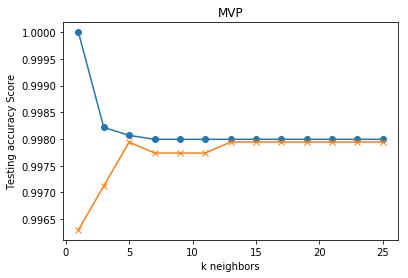

In [30]:
#Plot KNN
plt.plot(range(1, 27, 2), train_scores, marker='o')
plt.plot(range(1, 27, 2), test_scores, marker="x")

plt.title("MVP")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("images/KNN_MVP.png")
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))

c:\users\darri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k=1 Test Acc: 0.997


In [32]:
knn_predict = knn.predict(kndb_predict)

In [33]:
knn_predict.nonzero()

(array([120, 529, 549], dtype=int64),)

In [34]:
kndb_results.iloc[120]

Year                2017
Player     Stephen Curry
Pos                    G
Age                   28
Team                 GSW
G                     79
GS                    79
MP                  2638
PER                 24.6
TS%                0.624
3PAr               0.547
FTr                0.251
ORB%                 2.7
DRB%                11.4
TRB%                 7.3
AST%                31.1
STL%                 2.6
BLK%                 0.5
TOV%                  13
USG%                30.1
OWS                  8.6
DWS                  3.9
WS                  12.6
WS/48              0.229
OBPM                 7.7
DBPM                -0.4
BPM                  7.3
VORP                 6.2
FG                   675
FGA                 1443
FG%                0.468
3P                   324
3PA                  789
3P%                0.411
2P                   351
2PA                  654
2P%                0.537
eFG%                0.58
FT                   325
FTA                  362


In [36]:
from sklearn.metrics import classification_report
KNN = classifier.predict(X_test)
print(classification_report(y_test,KNN))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4854
         1.0       0.60      0.30      0.40        10

   micro avg       1.00      1.00      1.00      4864
   macro avg       0.80      0.65      0.70      4864
weighted avg       1.00      1.00      1.00      4864



In [37]:
# Model Accuracy
print('Test Acc: %.3f' % classifier.score(X_test, y_test))

Test Acc: 0.998
